<a href="https://colab.research.google.com/github/rfajri27/a555-data-visualization/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data

## Menyiapkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers_data = pd.read_csv('data/customers_dataset.csv')
customers_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_data = pd.read_csv('data/geolocation_dataset.csv')
geolocation_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
orders_items_data = pd.read_csv('data/order_items_dataset.csv')
orders_items_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_data = pd.read_csv('data/order_payments_dataset.csv')
order_payments_data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_data = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews_data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
order_data = pd.read_csv('data/orders_dataset.csv')
order_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category = pd.read_csv('data/product_category_name_translation.csv')
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
product_data = pd.read_csv('data/products_dataset.csv')
product_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
seller_data = pd.read_csv('data/sellers_dataset.csv')
seller_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Menilai Data

In [11]:
customers_data.info()
geolocation_data.info()
order_data.info()
order_payments_data.info()
order_reviews_data.info()
orders_items_data.info()
product_data.info()
product_category.info()
seller_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

#### Cek missing value data

In [12]:
print('\n info data null customer : \n', customers_data.isnull().sum())
print('\n info data null geolocation: \n', geolocation_data.isnull().sum())
print('\n info data null order : \n', order_data.isnull().sum())
print('\n info data null order payments: \n', order_payments_data.isnull().sum())
print('\n info data null order reviews : \n', order_reviews_data.isnull().sum())
print('\n info data null order items : \n', orders_items_data.isnull().sum())
print('\n info data null product data : \n', product_data.isnull().sum())
print('\n info data null product category : \n', product_category.isnull().sum())
print('\n info data null seller data : \n', seller_data.isnull().sum())


 info data null customer : 
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

 info data null geolocation: 
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

 info data null order : 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

 info data null order payments: 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

 info data null order reviews : 
 review_id                      0
order_i

### cek data duplikat

In [13]:
print('\n info data duplicated customer : ', customers_data.duplicated().sum())
print('\n info data duplicated geolocation: ', geolocation_data.duplicated().sum())
print('\n info data duplicated order : ', order_data.duplicated().sum())
print('\n info data duplicated order payments: ', order_payments_data.duplicated().sum())
print('\n info data duplicated order reviews : ', order_reviews_data.duplicated().sum())
print('\n info data duplicated order items : ', orders_items_data.duplicated().sum())
print('\n info data duplicated product data : ', product_data.duplicated().sum())
print('\n info data duplicated product category : ', product_category.duplicated().sum())
print('\n info data duplicated seller data : ', seller_data.duplicated().sum())


 info data duplicated customer :  0

 info data duplicated geolocation:  261831

 info data duplicated order :  0

 info data duplicated order payments:  0

 info data duplicated order reviews :  0

 info data duplicated order items :  0

 info data duplicated product data :  0

 info data duplicated product category :  0

 info data duplicated seller data :  0


### data describe

In [14]:
print('\n info data describe customer : \n', customers_data.describe(include='all'))
print('\n info data describe geolocation: \n', geolocation_data.describe(include='all'))
print('\n info data describe order : \n', order_data.describe(include='all'))
print('\n info data describe order payments: \n', order_payments_data.describe(include='all'))
print('\n info data describe order reviews : \n', order_reviews_data.describe(include='all'))
print('\n info data describe order items : \n', orders_items_data.describe(include='all'))
print('\n info data describe product data : \n', product_data.describe(include='all'))
print('\n info data describe product category : \n', product_category.describe(include='all'))
print('\n info data describe seller data : \n', seller_data.describe(include='all'))


 info data describe customer : 
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_pre

## data cleaning

### geolocation

In [15]:
geolocation_data.drop_duplicates(inplace=True)

### orders review

In [16]:
order_reviews_data[order_reviews_data.review_comment_title.isnull()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [17]:
order_reviews_data.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

In [18]:
order_reviews_data.drop(columns=['review_comment_title'], inplace=True)

In [19]:
order_reviews_data[order_reviews_data.review_comment_message.isnull()]

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [20]:
order_reviews_data.review_comment_message.value_counts()

review_comment_message
Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                            

In [21]:
order_reviews_data.fillna(value='no_comment', inplace=True)
order_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_message   99224 non-null  object
 4   review_creation_date     99224 non-null  object
 5   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.5+ MB


In [22]:
convert_to_datetime_order_reviews_data = ['review_creation_date', 'review_answer_timestamp']
for convert in convert_to_datetime_order_reviews_data:
    order_reviews_data[convert] = pd.to_datetime(order_reviews_data[convert])
order_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_message   99224 non-null  object        
 4   review_creation_date     99224 non-null  datetime64[ns]
 5   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 4.5+ MB


### order data

In [23]:
convert_to_datetime_order_data = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for convert in convert_to_datetime_order_data:
    order_data[convert] = pd.to_datetime(order_data[convert])
order_data['delivered_on_time'] = order_data.order_delivered_customer_date <= order_data.order_estimated_delivery_date
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   delivered_on_time              99441 non-null  bool          
dtypes: bool(1), datetime64[ns](5), object(3)
memory usage: 6.2+ MB


### order items data

In [24]:
orders_items_data.shipping_limit_date = pd.to_datetime(orders_items_data.shipping_limit_date)
orders_items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


### products

In [25]:
product_data[product_data.product_category_name.isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [26]:
product_data.product_category_name.fillna(value='other', inplace=True)
product_data.product_photos_qty.fillna(value=0, inplace=True)
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


## exploratory data analysis (EDA)

### __customer__

In [27]:
customers_data.sample(10) 

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
21328,e2d7302d9765c89609899067c37f4722,d7a86208b8dd2e697ddf825c386a0402,12246,sao jose dos campos,SP
47531,b9dbc440e8e2b2b72d19dc88459f6794,15d5cb0a0f50f613cead2be97251e823,36300,sao joao del rei,MG
53059,f0bff5bf56ab0827538fc34dd19e88b2,64b83dd53c5dc98ef2d034f1327b04de,38010,uberaba,MG
40150,5d305b9adfca9b56ca8cb095226e104f,9eaed62db4e25ad2ac2fcdec58a8e6cc,1456,sao paulo,SP
96024,2205062cf6fcb1d20614d865945329da,fdcb2a985790cba441e21a78d13d0266,4216,sao paulo,SP
19514,c641e645c883a6ad6f0c0b8f5a5d91b6,2d79826ad85a6a75e9dc526d7174ab70,74605,goiania,GO
10221,a26c9bd12cc56cc86b48dbce2c886194,892e12c641631898f13f2e50ab553c36,6311,carapicuiba,SP
80443,1f68e24da06f36cb8a5243e23c390bcf,c01ac50f437f46cc8fffb6d1a01d8631,30421,belo horizonte,MG
5420,8d1906125bb1f738d1f8a1d146ac3334,481a3e4c07971c950ac25f7317ac421b,65137,maioba,MA
45189,e038ce5f1155ad7b6235f4df7ecc77c6,49e653e04b8fbe4832f13fb086775258,68665,garrafao do norte,PA


In [28]:
customers_data.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [29]:
customers_data.groupby('customer_city').customer_unique_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                14984
rio de janeiro            6620
belo horizonte            2672
brasilia                  2069
curitiba                  1465
campinas                  1398
porto alegre              1326
salvador                  1209
guarulhos                 1153
sao bernardo do campo      908
Name: customer_unique_id, dtype: int64

In [30]:
customers_data.groupby('customer_state').customer_unique_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
Name: customer_unique_id, dtype: int64

### __order_payments__

In [31]:
order_payments_data.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
70466,934838488a3fc133b3cb9b1f716c5937,1,credit_card,6,68.44
38089,02333096645cf1743050acd043b76e69,1,credit_card,2,146.13
47996,fc54ccf498649592ae3befacdc91b8ee,1,credit_card,4,52.27
19114,a7db1b7bfec5e83a8fd33625e99f0d15,1,credit_card,3,466.95
49164,74bb37ec1177c69720bff87b248233cc,1,boleto,1,623.68
63612,ea74c0ec2238c2e2ad552859f6f30d37,1,credit_card,4,212.03
97960,294f94df7d2ec239123fdca1a458e0ff,1,credit_card,1,162.61
25842,bb1d715aef7774629f3b397e11807b87,1,credit_card,4,204.60
84767,e8bd6a70539a3b4888a2b8dd053b470d,1,credit_card,8,120.06
69176,6e28c34a895e831db6c3bca247819453,1,credit_card,4,310.25


In [32]:
order_payments_data.groupby('payment_type').order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### __order_data__

In [33]:
order_data.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
27226,2399cd92814172df4639c2347151dfd4,a0c3599b1d4051c520391ca3c6d2ac2c,delivered,2017-06-23 00:45:51,2017-06-23 01:03:06,2017-06-26 14:50:09,2017-07-06 15:02:38,2017-07-24,True
57259,676909a2d3e6b18493578ed09d3e9e03,7e059909ea55e4548694d7da1ee6ab13,delivered,2017-07-20 19:29:03,2017-07-20 19:43:26,2017-07-21 20:46:36,2017-07-31 17:37:45,2017-08-23,True
22174,61fbc5899c21d17064fe3d17911738b2,268b8b7bf0c5d5653047775c202d6936,delivered,2017-11-09 12:37:53,2017-11-09 12:56:45,2017-11-10 20:22:56,2017-11-22 21:11:02,2017-12-07,True
55892,78ac0881f0e98a1afd25f066d5451d70,bd2957d5d4bf88bcb379f95a029bc3c8,delivered,2018-01-25 14:04:44,2018-01-25 14:20:04,2018-01-26 00:42:59,2018-02-06 21:05:21,2018-02-22,True
92523,2bc3d02aecb787b5e3272b681c0092e7,0ccf50bf1017b1678f3a155fe83dc634,delivered,2018-01-27 13:37:38,2018-01-27 13:56:25,2018-01-29 23:22:33,2018-02-19 21:51:12,2018-02-26,True
76082,f92b608c97b4dfa2e808d0b4008d2475,b0414648ea181ad51b800a1a2d5e7503,delivered,2018-08-15 22:36:25,2018-08-15 22:50:10,2018-08-16 12:35:00,2018-08-23 19:56:53,2018-08-30,True
29980,b19f842d0b61315ace1d5428f07f7b98,c7b204f3ef56183108dce3b69f5a964b,delivered,2017-12-15 19:57:58,2017-12-15 20:11:19,2017-12-18 21:34:45,2017-12-21 15:25:09,2018-01-04,True
76729,56c52cf14c501d31e4d208bf86cecb53,809ad95bb436a0ababaa111dcc8064f1,delivered,2017-11-30 22:20:55,2017-12-01 10:31:15,2017-12-06 23:13:54,2017-12-15 19:35:16,2018-01-09,True
22575,6ca46f2b9a1592929647682510800e0e,13bf775a749925a15ef7cc1985b564f1,shipped,2018-08-24 17:02:19,2018-08-24 17:15:10,2018-08-27 15:15:00,NaT,2018-08-29,False
98488,2a20173829ff5bd342163335865aa490,4dbd34761bb1a1eb90ea2914481604b3,delivered,2018-01-10 13:12:43,2018-01-11 02:33:27,2018-01-17 17:34:14,2018-01-19 19:12:43,2018-02-08,True


In [34]:
order_data.delivered_on_time.value_counts()

delivered_on_time
True     88649
False    10792
Name: count, dtype: int64

### __customer_data and order_data__

merge customer_data & order_data

In [35]:
merge_customer_and_order = pd.merge(
    left = customers_data,
    right = order_data,
    how = 'left',
    left_on = 'customer_id',
    right_on = 'customer_id'
)
merge_customer_and_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,True
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,True
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,False
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,True
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,True


In [36]:
merge_customer_and_order.groupby('customer_city').order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

In [37]:
merge_customer_and_order.groupby('customer_state').order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

In [38]:
merge_customer_and_order.groupby('order_status').order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

In [39]:
merge_customer_and_order.delivered_on_time.value_counts()

delivered_on_time
True     88649
False    10792
Name: count, dtype: int64

__merge order payments dan order review__

In [40]:
merge_payment_review_order = pd.merge(
    left = order_payments_data,
    right = order_reviews_data,
    how = 'left',
    left_on = 'order_id',
    right_on = 'order_id'
)
merge_payment_review_order.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no_comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no_comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no_comment,2017-12-21,2017-12-22 01:10:39


In [41]:
merge_payment_review_order.groupby('payment_type').order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [43]:
merge_payment_review_order.groupby('payment_type').agg({
    'order_id': 'nunique',
    'payment_value': ['min', 'max', 'mean', 'sum']
})

order_id payment_value                                   
              nunique           min       max        mean          sum
payment_type                                                          
boleto          19784         11.62   7274.88  144.986413   2886679.49
credit_card     76505          0.01  13664.08  163.140977  12594157.13
debit_card       1528         13.38   4445.50  142.396569    218721.13
not_defined         3          0.00      0.00    0.000000         0.00
voucher          3866          0.00   3184.34   65.499655    381862.99

__merge customer order & order payment review__

In [45]:
merge_customer_order_payment_review = pd.merge(
    left = merge_customer_and_order,
    right = merge_payment_review_order,
    how = 'left',
    left_on = 'order_id',
    right_on = 'order_id'
)
merge_customer_order_payment_review.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,delivered_on_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,True,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,no_comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,True,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,no_comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,False,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,no_comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,True,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,no_comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,True,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


## order_items_data & seller_data

merge order_items_data & seller_data

In [50]:
orders_items_data.sample(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
8556,1388e91d7d43769d6bd71f89a48a2929,1,c1a06e885e363ce94a917ac747be25c3,c8b0e2b0a7095e5d8219575d5e7e1181,2018-06-20 14:19:43,107.99,18.56
40554,5c59770bf04560b62d68aaa3d7570fed,1,bace90a7338e9d31371ad47811cf4c7d,1a3df491d1c4f1589fc2b934ada68bf2,2018-05-21 02:53:21,89.00,23.20
9509,15c2d2803c9a7a4ba8f528a65814848d,1,db91bca0e0253d71433c22ac5acd0fbe,42fa4ee7240e9b8eb4576358ec142ba7,2018-04-30 14:32:10,119.90,18.72
74037,a8c02c01c51e3d93d9b19b9ef8b138ce,1,6d5a9cd602c26f8751612f77ff4c6a90,1d8dbc4f32378d715c717c1c1fc57bae,2018-01-22 22:30:04,109.90,14.50
3569,081acb555a1113c7c97b5c19a34852a1,1,65665f545332ae2d0532d676f841163c,75fbb52eda0cbc24f479d3b2fbfa8d3e,2017-07-20 20:50:15,16.90,17.63
51961,7638719ed77aa57687d32db4173ace35,1,db0e75ba1fc6537d68f2676f3b67d07f,7a67c85e85bb2ce8582c35f2203ad736,2018-06-13 22:31:38,249.99,23.05
37405,54e5e62447690f816827f631866b0e4b,1,bd588795ddfe953f64d59d514ba0527a,6560211a19b47992c3666cc44a7e94c0,2017-07-25 03:55:37,69.00,7.78
39603,5a0e61bf3bfdda7dd3ac0aae7dfb86ec,1,165f86fe8b799a708a20ee4ba125c289,7ddcbb64b5bc1ef36ca8c151f6ec77df,2017-11-08 03:15:25,146.99,13.58
104522,ed71f1a64302049b72e47ba345998b43,1,c00f76b76f52037b0fc9f71fd8a7ac10,77fccaae319668a8ab6cd0fd16aec48c,2018-05-24 03:16:21,99.00,13.68
50411,728a577861155d9f41746915e7cdd5f3,1,cf5fb18f3ac3f373759295cc8ba3e2c3,1eade46fba20122dc4aefb379f8c636b,2018-04-05 09:55:19,80.99,18.15


In [51]:
seller_data.sample(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
119,e24d3429d294b2eb200b064ebb035879,3514,sao paulo,SP
1576,e433f5fd4050e3352b5d83522b7fe24b,86702,arapongas,PR
2220,db2956745b3a8e9f3785c99f34b5d25e,11600,sao sebastiao,SP
2267,8160255418d5aaa7dbdc9f4c64ebda44,14940,ibitinga,SP
2181,bd4889b5e9133b35b66e42a8665cea5c,2963,sao paulo,SP
423,ceaec5548eefc6e23e6607c5435102e7,3821,sao paulo,SP
445,8c91bfea4263b8fba54081460693e2a1,98920,horizontina,RS
1966,562fc2f2c2863ab7e79a9e4388a58a14,13070,campinas,SP
2277,ffff564a4f9085cd26170f4732393726,13070,campinas,SP
1457,b5dd7151a92ccaaa282cbe9681a05f44,14020,ribeirao preto,SP


In [53]:
merge_items_seller_product = pd.merge(
    left = orders_items_data,
    right = seller_data,
    how = 'left',
    left_on = 'seller_id',
    right_on = 'seller_id'
)
merge_items_seller_product.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [54]:
merge_items_seller_product.groupby('seller_city').order_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo                24588
ibitinga                  6565
curitiba                  2722
santo andre               2711
belo horizonte            2414
rio de janeiro            2193
guarulhos                 2071
ribeirao preto            2019
sao jose do rio preto     1973
maringa                   1860
Name: order_id, dtype: int64

In [55]:
merge_items_seller_product.groupby('seller_state').order_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    70188
MG     7930
PR     7673
RJ     4353
SC     3667
RS     1989
DF      824
BA      569
GO      463
PE      406
Name: order_id, dtype: int64

## product & product category

In [56]:
product_data.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
11846,b7e5e565cf760233e922ed01e122ca8b,relogios_presentes,55.0,502.0,2.0,250.0,16.0,11.0,11.0
4536,1a9336bcfd7544237cf44cf3de1f5530,utilidades_domesticas,41.0,2427.0,1.0,2800.0,45.0,35.0,35.0
14590,ccac9976bafbf7e587bd2c29302e2314,perfumaria,53.0,2235.0,3.0,1500.0,20.0,25.0,20.0
22867,0736b2e56f06e14d3aa1bef54de26052,telefonia,33.0,367.0,3.0,75.0,19.0,3.0,11.0
4030,d065729477709c73459cad1d32cf311f,brinquedos,43.0,225.0,1.0,650.0,45.0,15.0,35.0
9542,f3dadec221142e379d7113915c1d0fa8,informatica_acessorios,57.0,206.0,4.0,250.0,16.0,6.0,14.0
16135,8a27fbb311995ff454749a35fc0bd9a9,cama_mesa_banho,58.0,123.0,2.0,500.0,40.0,8.0,30.0
5452,8ac24e23a102245823e640f485846289,eletronicos,32.0,598.0,5.0,525.0,20.0,15.0,25.0
247,84e1b9c6ba2ed178bd217097b41f1251,moveis_cozinha_area_de_servico_jantar_e_jardim,50.0,859.0,1.0,10893.0,33.0,88.0,44.0
26423,4aecca9430af7a8c0debefeed7b7607f,papelaria,49.0,612.0,3.0,700.0,45.0,16.0,30.0


In [57]:
product_category.sample(10)

,product_category_name,product_category_name_english
51,fashion_esporte,fashion_sport
40,casa_construcao,home_construction
24,climatizacao,air_conditioning
26,moveis_cozinha_area_de_servico_jantar_e_jardim,kitchen_dining_laundry_garden_furniture
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
14,brinquedos,toys
58,bebidas,drinks
37,agro_industria_e_comercio,agro_industry_and_commerce
47,moveis_quarto,furniture_bedroom
32,eletronicos,electronics


merge product data & product category

In [60]:
merge_product_category = pd.merge(
    left = product_data,
    right = product_category,
    how = 'left',
    left_on = 'product_category_name',
    right_on = 'product_category_name'
)
merge_product_category.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [61]:
merge_product_category.groupby('product_category_name_english').product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

In [62]:
merge_product_category.groupby('product_category_name').product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

merge items_seller_product & product_category

In [65]:
merge_seller_product = pd.merge(
    left = merge_product_category,
   right = merge_items_seller_product,
    how = 'left',
    left_on = 'product_id',
    right_on = 'product_id'
)
merge_seller_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [66]:
merge_seller_product.sort_values(by='price', ascending=False).head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
84506,259037a6a41845e455183f89c5035f18,pcs,55.0,1710.0,2.0,2900.0,35.0,10.0,40.0,computers,8dbc85d1447242f3b127dda390d56e19,1,c72de06d72748d1a0dfb2125be43ba63,2018-06-28 12:36:36,4590.00,91.78,46430,guanambi,BA
106405,a1beef8f3992dbd4cd8726796aa69c53,instrumentos_musicais,59.0,944.0,3.0,3550.0,71.0,34.0,22.0,musical_instruments,426a9742b533fc6fed17d1fd6d143d7e,1,512d298ac2a96d1931b6bd30aa21f61d,2018-08-16 14:24:28,4399.87,113.45,20060,rio de janeiro,RJ
104826,6cdf8fc1d741c76586d8b6b15e9eef30,consoles_games,59.0,3172.0,1.0,3050.0,34.0,10.0,22.0,consoles_games,68101694e5c5dc7330c91e1bbc36214f,1,ed4acab38528488b65a9a9c603ff024a,2018-04-05 08:27:27,4099.99,75.27,8260,sao paulo,SP
46034,dd113cb02b2af9c8e5787e8f1f0722f6,esporte_lazer,51.0,1511.0,1.0,8000.0,55.0,25.0,45.0,sports_leisure,b239ca7cd485940b31882363b52e6674,1,821fb029fc6e495ca4f08a35d51e53a5,2018-08-02 08:15:14,4059.00,104.51,2030,sao paulo,SP
40027,6902c1962dd19d540807d0ab8fade5c6,relogios_presentes,53.0,1773.0,2.0,800.0,16.0,11.0,11.0,watches_gifts,86c4eab1571921a6a6e248ed312f5a5a,1,fa1c13f2614d7b5c4749cbc52fecda94,2017-03-23 20:08:04,3999.90,17.01,13170,sumare,SP


In [68]:
merge_seller_product.groupby('product_category_name_english').agg({
    'order_id' : 'nunique',
    'price': ['min', 'max', 'mean', 'sum']
})

order_id  price                                 
                               nunique    min      max        mean         sum
product_category_name_english                                                 
agro_industry_and_commerce         182  12.99  2990.00  342.124858    72530.47
air_conditioning                   253  10.90  1599.00  185.269226    55024.96
art                                202   3.50  6499.00  115.802105    24202.64
arts_and_craftmanship               23   9.80   289.49   75.583750     1814.01
audio                              350  14.90   598.99  139.254121    50688.50
...                                ...    ...      ...         ...         ...
stationery                        2311   2.29  1693.00   91.753369   230943.23
tablets_printing_image              79  14.90   889.99   90.703735     7528.41
telephony                         4199   5.00  2428.00   71.213978   323667.53
toys                              3886   4.90  1699.99  117.548360   483946.60
watches_gifts                     5624   8.99  3999.90  201.135984  1205005.68

[71 rows x 5 columns]

## geolocation

In [73]:
geolocation_data.sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
643252,38175,-19.307959,-47.526049,santa juliana,MG
627564,37200,-21.231019,-45.001353,lavras,MG
342816,14802,-21.777151,-48.187315,araraquara,SP
900089,88034,-27.585238,-48.500744,florianopolis,SC
383169,18150,-23.661724,-47.218583,ibiuna,SP
939507,90020,-30.031609,-51.234612,porto alegre,RS
857887,82800,-25.429657,-49.226744,curitiba,PR
149554,6065,-23.555398,-46.788632,osasco,SP
803298,75084,-16.311276,-48.937790,anapolis,GO
34943,2618,-23.540620,-46.595011,sao paulo,SP


In [74]:
geolocation_data.groupby('geolocation_city').geolocation_zip_code_prefix.nunique().sort_values(ascending=False).head(10)    

geolocation_city
sao paulo         3171
são paulo         3013
brasilia           496
brasília           406
rio de janeiro     404
salvador           275
goiania            233
goiânia            210
belo horizonte     205
fortaleza          172
Name: geolocation_zip_code_prefix, dtype: int64

In [76]:
geolocation_data.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False).head(10)

geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
38408    621
39400    620
35162    611
37200    596
35900    589
dtype: int64

In [79]:
geolocation_data[geolocation_data.geolocation_zip_code_prefix == 22790].head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
454148,22790,-23.011335,-43.450256,rio de janeiro,RJ
454149,22790,-23.009535,-43.436039,rio de janeiro,RJ
454155,22790,-23.018713,-43.452904,rio de janeiro,RJ
454162,22790,-23.005940,-43.481812,rio de janeiro,RJ
454163,22790,-23.006000,-43.481799,rio de janeiro,RJ
454169,22790,-23.017203,-43.451222,rio de janeiro,RJ
454174,22790,-23.009410,-43.435570,rio de janeiro,RJ
454179,22790,-23.022137,-43.487044,rio de janeiro,RJ
454180,22790,-23.020964,-43.469564,rio de janeiro,RJ
454183,22790,-23.011119,-43.443296,rio de janeiro,RJ


### explore semua data

In [81]:
merge_all = pd.merge(
    left = merge_customer_order_payment_review,
    right = merge_seller_product,
    how = 'left',
    left_on = 'order_id',
    right_on = 'order_id'
)
merge_all.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,15.0,sports_leisure,1.0,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,13.0,computers_accessories,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102.0,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,20.0,NaN,1.0,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11,4142.0,sao paulo,SP
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,12.0,toys,1.0,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,21210.0,rio de janeiro,RJ
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,30.0,furniture_decor,1.0,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,80330.0,curitiba,PR


In [83]:
merge_all.duplicated().sum()


0

In [84]:
merge_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

In [88]:
merge_all.groupby(by = ['customer_city', 'product_category_name_english']).agg({
    'price': 'sum',
    'payment_value' : 'sum'
})

price  payment_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          58.28
                    cool_stuff                     199.00         219.63
                    sports_leisure                 120.00         135.59
abadiania           small_appliances               949.99        1025.52
abaete              baby                            65.00          82.70
...                                                   ...            ...
ze doca             food_drink                      65.00         103.00
                    garden_tools                    39.90          66.51
                    musical_instruments            359.00         408.04
                    sports_leisure                 149.90         188.50
zortea              computers_accessories           69.90          90.88

[25199 rows x 2 columns]

In [91]:
merge_all.groupby('product_category_name_english').agg({
    'price' : 'mean',
    'review_score' : 'mean'
})

,price,review_score
product_category_name_english,,
agro_industry_and_commerce,332.706151,4.150794
air_conditioning,185.305894,3.969697
art,112.885708,3.935484
arts_and_craftmanship,75.583750,4.125000
audio,137.795984,3.840849
...,...,...
stationery,91.194655,4.188339
tablets_printing_image,90.118506,4.117647
telephony,71.851678,3.948849


In [92]:
merge_all.to_csv('data/merge_all.csv', index=False)

## visualization

### 1. produk apa yang paling banyak dan sedikit terjual?

##### Duplicate data

In [ ]:
customers_df.duplicated().sum()

6

In [ ]:
customers_df.drop_duplicates(inplace=True)

In [ ]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


##### Missing values

In [ ]:
customers_df.isna().sum()

customer_id       0
customer_name     0
gender           18
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64

In [ ]:
customers_df[customers_df.gender.isna()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


In [ ]:
customers_df.gender.value_counts()

Prefer not to say    725
Male                 143
Female               115
Name: gender, dtype: int64

In [ ]:
customers_df.fillna(value="Prefer not to say", inplace=True)

In [ ]:
customers_df.isna().sum()

customer_id      0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
dtype: int64

##### Inaccurate value

In [ ]:
customers_df.describe()

,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,50.953047,5000.693307
std,289.013599,30.578437,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,700.000000,9998.000000


In [ ]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


In [ ]:
customers_df.age.replace(customers_df.age.max(), 70, inplace=True)

In [ ]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia


In [ ]:
customers_df.age.replace(customers_df.age.max(), 50, inplace=True)

In [ ]:
customers_df.describe()

,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,49.874126,5000.693307
std,289.013599,17.644663,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,80.000000,9998.000000


#### Membersihkan tabel `orders_df`

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


##### Memperbaiki tipe data

In [ ]:
datetime_columns = ["order_date", "delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


In [ ]:
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-08-30,2021-09-24
1,2,473,50490,2021-02-03,2021-02-13
2,3,774,46763,2021-10-08,2021-11-03
3,4,433,39782,2021-05-06,2021-05-19
4,5,441,14719,2021-03-23,2021-03-24


#### Membersihkan tabel `product_df`

##### Duplicate data

In [ ]:
product_df[product_df.duplicated()]

,product_id,product_type,product_name,size,colour,price,quantity,description
112,54,Shirt,Dress,XL,green,119,52,"A green coloured, XL sized, Dress Shirt"
232,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"
365,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"
435,377,Shirt,Henley,M,indigo,92,70,"A indigo coloured, M sized, Henley Shirt"
540,483,Jacket,Puffer,L,indigo,110,61,"A indigo coloured, L sized, Puffer Jacket"
587,579,Jacket,Bomber,XL,green,90,79,"A green coloured, XL sized, Bomber Jacket"


In [ ]:
product_df.drop_duplicates(inplace=True)

In [ ]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  0


#### Membersihkan tabel `sales_df`

##### Missing values

In [ ]:
sales_df.isna().sum()

sales_id           0
order_id           0
product_id         0
price_per_unit     0
quantity           0
total_price       19
dtype: int64

In [ ]:
sales_df[sales_df.total_price.isna()]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


In [ ]:
sales_df["total_price"] = sales_df["price_per_unit"] * sales_df["quantity"]

In [ ]:
sales_df.isna().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [ ]:
customers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
952,946,fulan 946,Prefer not to say,24,8227 Nicholas HillSuite 150,115,South Jasper,Queensland,Australia
280,281,fulan 281,Prefer not to say,24,95 Oliver SquareApt. 137,7637,Evafort,Queensland,Australia
264,265,fulan 265,Male,52,35 Baumbach HillApt. 244,5072,Lake Laurenview,Tasmania,Australia
333,333,fulan 333,Prefer not to say,57,2797 Corkery KnollApt. 001,2571,West Marcus,South Australia,Australia
536,536,fulan 536,Prefer not to say,32,6479 Schmidt BoulevardApt. 840,5125,Charlifort,New South Wales,Australia


In [ ]:
customers_df.describe(include="all")

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1001.000000,1001,1001,1001.000000,1001,1001.000000,1001,1001,1001
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 943,Prefer not to say,NaN,3117 Heller PlaceSuite 149,NaN,New Ava,South Australia,Australia
freq,NaN,2,743,NaN,2,NaN,3,140,1001
mean,500.942058,NaN,NaN,49.874126,NaN,5000.693307,NaN,NaN,NaN
std,289.013599,NaN,NaN,17.644663,NaN,2886.084454,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,251.000000,NaN,NaN,34.000000,NaN,2398.000000,NaN,NaN,NaN
50%,501.000000,NaN,NaN,50.000000,NaN,5079.000000,NaN,NaN,NaN
75%,751.000000,NaN,NaN,65.000000,NaN,7454.000000,NaN,NaN,NaN


In [ ]:
customers_df.customer_id.is_unique

False

In [ ]:
customers_df.customer_id.duplicated

<bound method Series.duplicated of 0          1
1          2
2          3
3          4
4          5
        ... 
1002     996
1003     997
1004     998
1005     999
1006    1000
Name: customer_id, Length: 1001, dtype: int64>

In [63]:
customers_df.groupby(by="gender").agg({
    "customer_id": "nunique",
    "age": ["max", "min", "mean", "std", ]
})

NameError: name 'customers_df' is not defined

In [ ]:
customers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False)

city
East Aidan       3
East Sophia      3
New Ava          3
West Jackfort    2
Corkeryshire     2
                ..
Jordanside       1
Josephland       1
Josephmouth      1
Justinport       1
Zacville         1
Name: customer_id, Length: 961, dtype: int64

In [ ]:
customers_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False)

state
South Australia                 139
Queensland                      134
New South Wales                 132
Northern Territory              125
Western Australia               124
Australian Capital Territory    121
Victoria                        121
Tasmania                        104
Name: customer_id, dtype: int64

### Explore `orders_df`

In [ ]:
orders_df.sample(5)

,order_id,customer_id,payment,order_date,delivery_date
375,376,571,15454,2021-07-04,2021-07-17
622,623,808,36530,2021-10-20,2021-10-30
770,771,970,33204,2021-06-06,2021-06-18
874,875,383,25336,2021-02-26,2021-02-27
717,718,665,55727,2021-05-13,2021-05-20


In [ ]:
delivery_time = orders_df["delivery_date"] - orders_df["order_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [ ]:
orders_df.sample(5)

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
185,186,833,24061,2021-09-26,2021-10-14,18.0
513,514,740,13918,2021-07-12,2021-07-22,10.0
692,693,714,28424,2021-04-29,2021-05-16,17.0
732,733,387,42467,2021-05-26,2021-06-22,27.0
606,607,648,36692,2021-10-19,2021-11-12,24.0


In [ ]:
orders_df.describe(include="all")

<ipython-input-54-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")


,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
unique,NaN,NaN,NaN,291,305,NaN
top,NaN,NaN,NaN,2021-06-20 00:00:00,2021-08-09 00:00:00,NaN
freq,NaN,NaN,NaN,10,9,NaN
first,NaN,NaN,NaN,2021-01-01 00:00:00,2021-01-03 00:00:00,NaN
last,NaN,NaN,NaN,2021-10-24 00:00:00,2021-11-20 00:00:00,NaN
mean,500.500000,506.640000,33972.936000,NaN,NaN,14.078000
std,288.819436,277.115502,14451.609047,NaN,NaN,7.707225
min,1.000000,1.000000,10043.000000,NaN,NaN,1.000000
25%,250.750000,275.250000,21329.250000,NaN,NaN,8.000000


<AxesSubplot:>

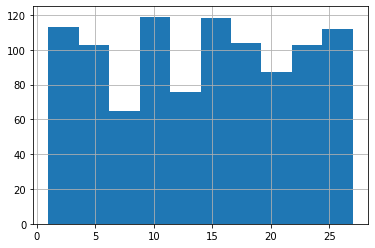

In [ ]:
orders_df.delivery_time.hist()

In [ ]:
customer_id_in_orders_df =  orders_df.customer_id
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
472,472,fulan 472,Male,57,64 Aiden View RdSuite 085,4994,Parisianmouth,Queensland,Australia,Active
1001,995,fulan 995,Prefer not to say,63,19 Jordan Station StSuite 655,3742,Hermistonberg,Western Australia,Australia,Active
386,386,fulan 386,Prefer not to say,29,50 Layla LoopSuite 081,3016,Hannahborough,Tasmania,Australia,Active
168,169,fulan 169,Female,72,5135 Leah RoadSuite 306,7210,South Georgia,Western Australia,Australia,Active
383,383,fulan 383,Prefer not to say,23,831 Ava SquareApt. 776,2310,South Hannahstad,Victoria,Australia,Active


In [ ]:
customers_df.groupby(by="status").customer_id.count()

status
Active        1000
Non Active       1
Name: customer_id, dtype: int64

In [ ]:
customers_df[customers_df.status == "Non Active"]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
1006,1000,fulan 1000,Male,71,1671 Lauren KnollSuite 945,9012,Lake Audreyborough,Tasmania,Australia,Non Active


### Explore `orders_df` & `customers_df`

#### Menggabungkan data `customers_df` dan `orders_df`

In [ ]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10.0,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26.0,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13.0,fulan 433,Prefer not to say,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1.0,fulan 441,Prefer not to say,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,Active


In [ ]:
orders_customers_df.groupby(by="city").order_id.nunique().sort_values(ascending=False).head(10)

city
Jordanside          6
New Ava             6
Lake Rose           5
O'keefeton          5
East Max            5
Port Hannahburgh    5
Rubyfort            5
West Kai            5
Andrewborough       4
Port Aaronton       4
Name: order_id, dtype: int64

In [ ]:
orders_customers_df.groupby(by="state").order_id.nunique().sort_values(ascending=False)

state
South Australia                 148
Queensland                      139
Western Australia               130
New South Wales                 129
Australian Capital Territory    118
Victoria                        118
Tasmania                        112
Northern Territory              106
Name: order_id, dtype: int64

In [ ]:
orders_customers_df.groupby(by="gender").order_id.nunique().sort_values(ascending=False)

gender
Prefer not to say    725
Female               139
Male                 136
Name: order_id, dtype: int64

In [ ]:
orders_customers_df["age_group"] = orders_customers_df.age.apply(lambda x: "Youth" if x <= 24 else ("Seniors" if x > 64 else "Adults"))

In [ ]:
orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(ascending=False)

age_group
Adults     681
Seniors    226
Youth       93
Name: order_id, dtype: int64

### Explore `product_df`

In [ ]:
product_df.sample(10)

,product_id,product_type,product_name,size,colour,price,quantity,description
979,973,Trousers,Slim-Fit,L,indigo,119,48,"A indigo coloured, L sized, Slim-Fit Trousers"
685,679,Jacket,Parka,XL,yellow,119,44,"A yellow coloured, XL sized, Parka Jacket"
387,384,Shirt,Henley,XL,violet,92,77,"A violet coloured, XL sized, Henley Shirt"
784,778,Jacket,Pullover,L,orange,114,56,"A orange coloured, L sized, Pullover Jacket"
659,653,Jacket,Coach,L,blue,115,80,"A blue coloured, L sized, Coach Jacket"
515,511,Jacket,Windbreaker,S,blue,109,41,"A blue coloured, S sized, Windbreaker Jacket"
678,672,Jacket,Parka,M,orange,119,51,"A orange coloured, M sized, Parka Jacket"
63,63,Shirt,Dress,L,indigo,119,71,"A indigo coloured, L sized, Dress Shirt"
769,763,Jacket,Peacoat,L,indigo,102,45,"A indigo coloured, L sized, Peacoat Jacket"
842,836,Jacket,Shearling,S,violet,95,49,"A violet coloured, S sized, Shearling Jacket"


In [ ]:
product_df.describe(include="all")

,product_id,product_type,product_name,size,colour,price,quantity,description
count,1260.000000,1260,1260,1260,1260,1260.000000,1260.000000,1260
unique,NaN,3,35,8,7,NaN,NaN,1260
top,NaN,Shirt,Denim,XS,red,NaN,NaN,"A red coloured, XS sized, Oxford Cloth Shirt"
freq,NaN,420,70,252,180,NaN,NaN,1
mean,629.500000,NaN,NaN,NaN,NaN,105.805556,60.150000,NaN
std,363.874979,NaN,NaN,NaN,NaN,9.704423,11.670573,NaN
min,0.000000,NaN,NaN,NaN,NaN,90.000000,40.000000,NaN
25%,314.750000,NaN,NaN,NaN,NaN,95.750000,50.000000,NaN
50%,629.500000,NaN,NaN,NaN,NaN,108.500000,60.000000,NaN
75%,944.250000,NaN,NaN,NaN,NaN,114.000000,70.000000,NaN


In [ ]:
product_df.sort_values(by="price", ascending=False)

,product_id,product_type,product_name,size,colour,price,quantity,description
704,698,Jacket,Parka,L,violet,119,53,"A violet coloured, L sized, Parka Jacket"
671,665,Jacket,Parka,XS,red,119,65,"A red coloured, XS sized, Parka Jacket"
698,692,Jacket,Parka,M,indigo,119,66,"A indigo coloured, M sized, Parka Jacket"
699,693,Jacket,Parka,L,indigo,119,44,"A indigo coloured, L sized, Parka Jacket"
700,694,Jacket,Parka,XL,indigo,119,78,"A indigo coloured, XL sized, Parka Jacket"
...,...,...,...,...,...,...,...,...
1225,1219,Trousers,Pleated,XL,indigo,90,45,"A indigo coloured, XL sized, Pleated Trousers"
1226,1220,Trousers,Pleated,XS,violet,90,58,"A violet coloured, XS sized, Pleated Trousers"
1227,1221,Trousers,Pleated,S,violet,90,50,"A violet coloured, S sized, Pleated Trousers"
1228,1222,Trousers,Pleated,M,violet,90,45,"A violet coloured, M sized, Pleated Trousers"


In [ ]:
product_df.groupby(by="product_type").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price":  ["min", "max"]
})

product_id quantity price     
                nunique      sum   min  max
product_type                               
Jacket              420    25387    90  119
Shirt               420    25263    92  119
Trousers            420    25139    90  119

In [ ]:
product_df.groupby(by="product_name").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
})

product_id quantity price     
                     nunique      sum   min  max
product_name                                    
Bomber                    35     2083    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204    92  115
Drawstring                35     2042   104  104
Dress                     35     2125   119  119
Flannel                   35     2135    96   96
Henley                    35     2051    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2138   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     1946   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

### Explore `sales_df`

In [ ]:
sales_df.sample(5)

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
4236,4236,843,1236,112,3,336
2383,2383,483,1209,105,1,105
1933,1933,388,15,96,2,192
3186,3186,642,935,96,2,192
1598,1598,326,695,113,3,339


In [ ]:
sales_df.describe(include="all")

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


In [ ]:
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
0,1,64,30811,2021-08-30,2021-09-24,25.0
1,2,473,50490,2021-02-03,2021-02-13,10.0
2,3,774,46763,2021-10-08,2021-11-03,26.0
3,4,433,39782,2021-05-06,2021-05-19,13.0
4,5,441,14719,2021-03-23,2021-03-24,1.0


In [ ]:
sales_df.groupby(by="order_id").total_price.sum()

order_id
1      1487
2      1130
3       508
4       976
5      2043
       ... 
995    1127
996    1459
997     204
998    1352
999     440
Name: total_price, Length: 993, dtype: int64

### Explore `sales_df` & `product_df`

#### Menggabungkan data `sales_df` dan `product_df`

In [ ]:
sales_product_df = pd.merge(
    left=sales_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sales_product_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


Jika diperhatikan terdapat perbedaan antara nilai **price_per_unit** dan **price**. Hal ini bisa terjadi karena adanya potongan harga, biaya operasional, atau biaya lainnya.

In [ ]:
sales_product_df.groupby(by="product_type").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
})

,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3343,357026
Shirt,1641,3259,333600
Trousers,1683,3360,341174


In [ ]:
sales_product_df.groupby(by="product_name").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Casual Slim Fit,154,306,36414
Trench Coat,146,299,35581
Shearling,150,302,35334
Puffer,140,298,35164
Flannel,141,281,33158
Cropped,135,284,32660
Pleated,147,308,32340
Joggers,164,334,31062


### Explore all data

#### Menghubungkan semua data

In [ ]:
all_df = pd.merge(
    left=sales_product_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors


In [ ]:
all_df.groupby(by=["city", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
city        product_type                         
Abbeyshire  Jacket                 7          683
            Shirt                  7          739
            Trousers              12         1209
Abbottburgh Jacket                 3          279
            Shirt                  9          937
...                              ...          ...
Zacharybury Trousers              17         1829
Zacshire    Jacket                 2          224
            Shirt                  2          184
Zacville    Jacket                 6          645
            Shirt                  4          394

[1602 rows x 2 columns]

In [ ]:
all_df.groupby(by=["state", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
state                        product_type                         
Australian Capital Territory Jacket               406        43204
                             Shirt                396        40448
                             Trousers             454        46790
New South Wales              Jacket               451        47998
                             Shirt                431        43980
                             Trousers             392        39766
Northern Territory           Jacket               365        38991
                             Shirt                336        33865
                             Trousers             384        38998
Queensland                   Jacket               499        53511
                             Shirt                417        42506
                             Trousers             453        46045
South Australia              Jacket               461        49090
                             Shirt                509        52685
                             Trousers             455        46041
Tasmania                     Jacket               412        44370
                             Shirt                387        39668
                             Trousers             379        38057
Victoria                     Jacket               359        38203
                             Shirt                390        40206
                             Trousers             414        41948
Western Australia            Jacket               390        41659
                             Shirt                393        40242
                             Trousers             429        43529

In [ ]:
all_df.groupby(by=["gender", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
gender            product_type                         
Female            Jacket               481        50963
                  Shirt                445        45146
                  Trousers             481        49295
Male              Jacket               480        50978
                  Shirt                410        41939
                  Trousers             453        46071
Prefer not to say Jacket              2382       255085
                  Shirt               2404       246515
                  Trousers            2426       245808

In [ ]:
all_df.groupby(by=["age_group", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
age_group product_type                         
Adults    Jacket              2292       245055
          Shirt               2225       227781
          Trousers            2272       231271
Seniors   Jacket               777        82959
          Shirt                733        74977
          Trousers             766        77471
Youth     Jacket               274        29012
          Shirt                301        30842
          Trousers             322        32432

In [ ]:
all_df.groupby(by="state").agg({
    "order_id": "nunique",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

,order_id,total_price
state,,
South Australia,144,147816
Queensland,139,142062
New South Wales,129,131744
Australian Capital Territory,118,130442
Western Australia,130,125430
Tasmania,112,122095
Victoria,115,120357
Northern Territory,106,111854


In [ ]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

In [ ]:
all_df.sample(5)

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
2548,2548,513,843,113,2,226,Trousers,Chinos,L,red,...,fulan 950,Male,43,3414 Mia MallApt. 446,3051,Bergefort,Victoria,Australia,Active,Adults
285,285,65,744,109,3,327,Jacket,Peacoat,XL,orange,...,fulan 388,Prefer not to say,38,46 Spencer MeadowSuite 241,2940,New Mayaburgh,Northern Territory,Australia,Active,Adults
3945,3945,787,397,119,1,119,Shirt,Casual Slim Fit,M,yellow,...,fulan 44,Prefer not to say,60,6308 Amelie MeadowSuite 634,9842,Eliburgh,Tasmania,Australia,Active,Adults
1842,1842,372,626,112,1,112,Jacket,Cardigan,S,violet,...,fulan 991,Prefer not to say,30,8164 Stanton IslandApt. 438,4952,North Andrew,Tasmania,Australia,Active,Adults
1218,1218,252,397,119,2,238,Shirt,Casual Slim Fit,M,yellow,...,fulan 683,Prefer not to say,45,098 Clarke ParkwayApt. 312,3661,West Finnberg,Australian Capital Territory,Australia,Active,Adults


In [ ]:
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
0,1,64,30811,2021-08-30,2021-09-24,25.0
1,2,473,50490,2021-02-03,2021-02-13,10.0
2,3,774,46763,2021-10-08,2021-11-03,26.0
3,4,433,39782,2021-05-06,2021-05-19,13.0
4,5,441,14719,2021-03-23,2021-03-24,1.0


In [ ]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi Tahun-Bulan
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_date,order_count,revenue
0,January,109,119333
1,February,93,95080
2,March,117,131364
3,April,99,97530
4,May,84,85597


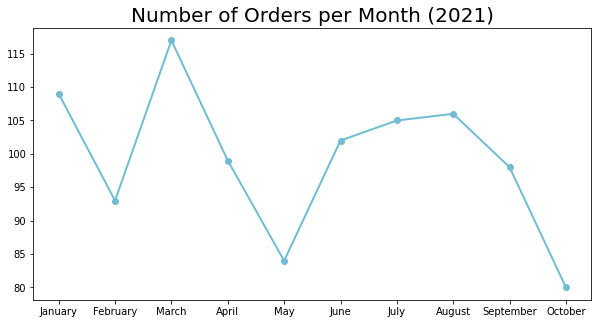

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["order_count"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

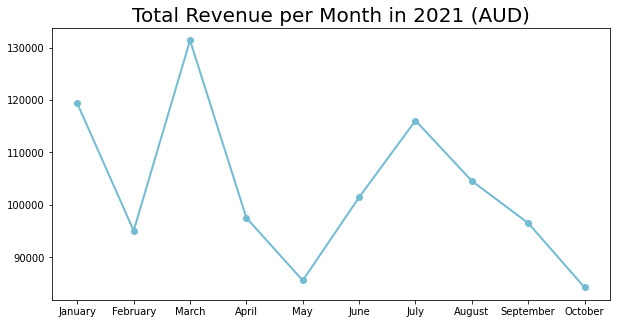

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month in 2021 (AUD)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Produk apa yang paling banyak dan paling sedikit terjual?

In [ ]:
sum_order_items_df = all_df.groupby("product_name").quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(10)

,product_name,quantity_x
0,Denim,527
1,Joggers,334
2,Pleated,308
3,Casual Slim Fit,306
4,Shearling,302
5,Relaxed Leg,301
6,Trench Coat,299
7,Puffer,298
8,Bomber,297
9,Chambray,290


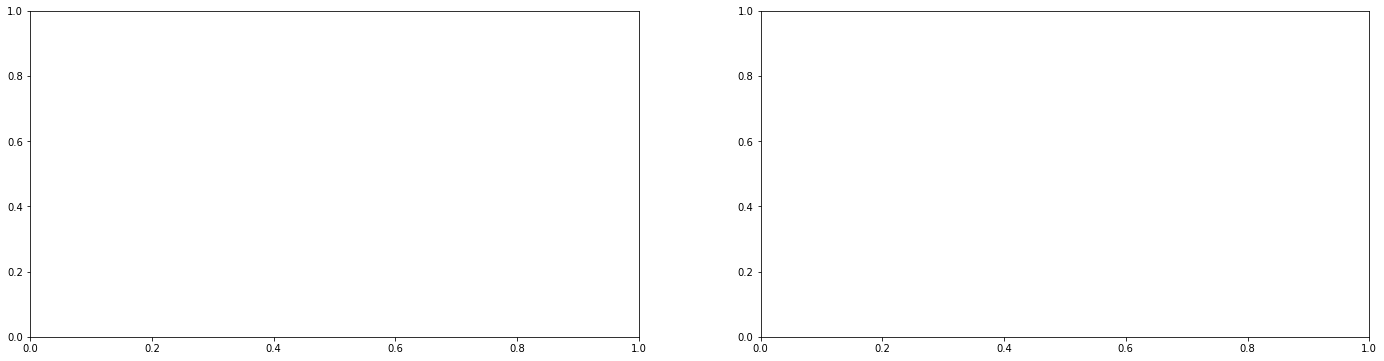

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))


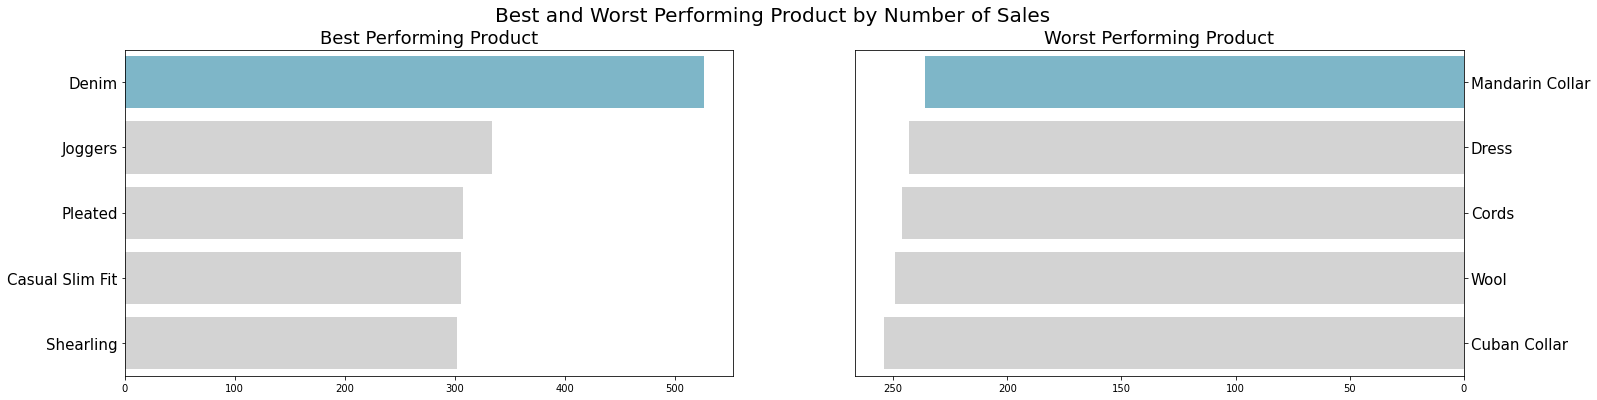

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### Bagaimana demografi pelanggan yang kita miliki?

#### Berdasarkan gender

In [ ]:
bygeder_df = all_df.groupby(by="gender").customer_id.nunique().reset_index()
bygeder_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bygeder_df

,gender,customer_count
0,Female,73
1,Male,82
2,Prefer not to say,461


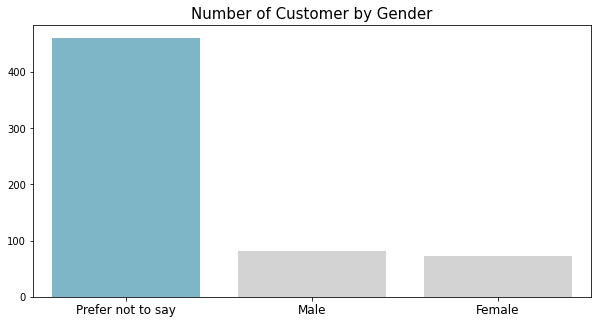

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count", 
    x="gender",
    data=bygeder_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Gender", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

#### Berdasarkan kelompok usia

In [ ]:
byage_df = all_df.groupby(by="age_group").customer_id.nunique().reset_index()
byage_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
byage_df

,age_group,customer_count
0,Adults,416
1,Seniors,145
2,Youth,55


In [ ]:
byage_df['age_group'] = pd.Categorical(byage_df['age_group'], ["Youth", "Adults", "Seniors"])

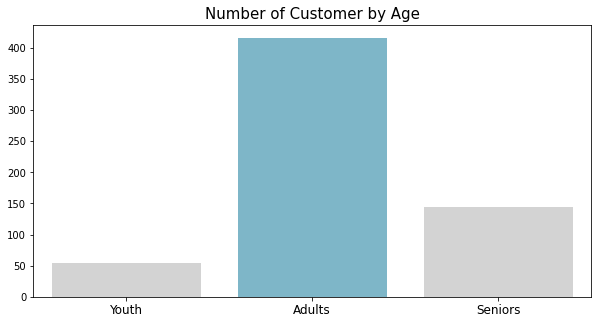

In [ ]:
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="customer_count", 
    x="age_group",
    data=byage_df.sort_values(by="age_group", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by Age", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

#### Berdasarkan Negara Bagian

In [ ]:
bystate_df = all_df.groupby(by="state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df

,state,customer_count
0,Australian Capital Territory,73
1,New South Wales,77
2,Northern Territory,75
3,Queensland,79
4,South Australia,90
5,Tasmania,67
6,Victoria,75
7,Western Australia,80


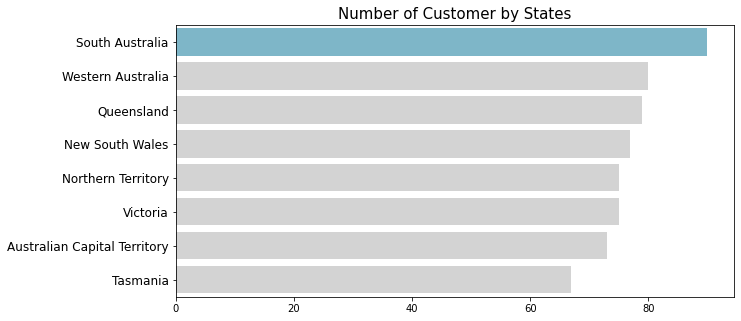

In [ ]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [ ]:
# plt.figure(figsize=(10, 5))
# sns.barplot(
#     x="order_count", 
#     y="state",
#     data=bystate_df.sort_values(by="order_count", ascending=False),
#     palette=colors_
# )
# plt.title("Number of Orders by States", loc="center", fontsize=15)
# plt.ylabel(None)
# plt.xlabel(None)
# plt.tick_params(axis='y', labelsize=12)
# plt.show()

### RFM Analysis

In [ ]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_date": "max", #mengambil tanggal order terakhir
    "order_id": "nunique",
    "total_price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,1,2021-04-04,3,1641
1,7,2021-05-21,1,1017
2,10,2021-03-09,1,270
3,11,2021-05-28,1,382
4,12,2021-06-19,1,1551


In [ ]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,1,2021-04-04,3,1641,203
1,7,2021-05-21,1,1017,156
2,10,2021-03-09,1,270,229
3,11,2021-05-28,1,382,149
4,12,2021-06-19,1,1551,127


In [ ]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,1,3,1641,203
1,7,1,1017,156
2,10,1,270,229
3,11,1,382,149
4,12,1,1551,127


In [ ]:
rfm_df.describe()

,customer_id,frequency,monetary,recency
count,616.00000,616.000000,616.000000,616.000000
mean,501.75974,1.612013,1675.000000,122.469156
std,286.16075,0.853754,1069.724092,84.326017
min,1.00000,1.000000,100.000000,0.000000
25%,259.50000,1.000000,878.250000,50.750000
50%,496.50000,1.000000,1439.000000,110.500000
75%,751.00000,2.000000,2165.000000,191.000000
max,1000.00000,6.000000,7632.000000,296.000000


In [ ]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
241,401,4,3093,0
425,687,1,1122,0
426,690,3,3693,0
98,163,3,3494,1
250,415,2,2269,1


In [ ]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
350,571,6,6640,66
212,348,5,5119,24
346,566,5,5435,5
409,664,5,6341,20
166,282,5,7632,63


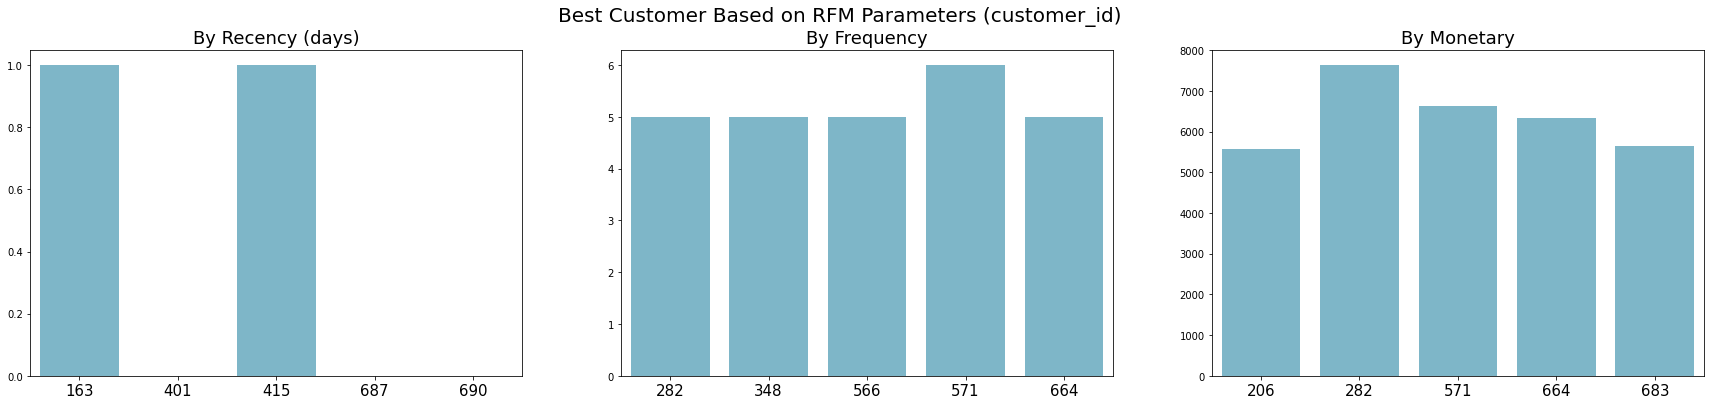

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

#### Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [ ]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,1,3,1641,203,133.0,560.0,351.0
1,7,1,1017,156,215.5,179.5,195.5
2,10,1,270,229,83.0,179.5,11.0
3,11,1,382,149,233.0,179.5,21.0
4,12,1,1551,127,267.5,179.5,330.0


In [ ]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,1,3,1641,203,21.626016,90.909091,56.980519
1,7,1,1017,156,35.040650,29.139610,31.737013
2,10,1,270,229,13.495935,29.139610,1.785714
3,11,1,382,149,37.886179,29.139610,3.409091
4,12,1,1551,127,43.495935,29.139610,53.571429


In [ ]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,1,3.06
1,7,1.58
2,10,0.56
3,11,0.79
4,12,2.26
5,13,1.14
6,15,3.84


#### Segmentasi customer berdasarkan RFM_score

In [ ]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,1,3.06,Medium value customer
1,7,1.58,lost customers
2,10,0.56,lost customers
3,11,0.79,lost customers
4,12,2.26,Low value customers
5,13,1.14,lost customers
6,15,3.84,Medium value customer
7,16,2.33,Low value customers
8,18,3.30,Medium value customer
9,19,1.68,Low value customers


In [ ]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,50
1,Low value customers,204
2,Medium value customer,137
3,Top customers,35
4,lost customers,190


In [ ]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

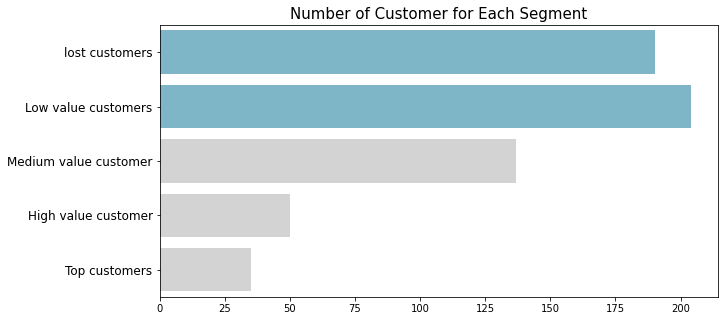

In [ ]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()